# 1. What's the distribution of the demand for rental bikes throughout time? Is the demand higher in the weekdays than the weekends?

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Update matplotlib defaults to something nicer 
plt_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[10.0,5.0],
              'axes.labelsize':20,
              'axes.titlesize':20,
              'lines.linewidth':3}
sns.set(style="darkgrid", color_codes=True)
plt.rcParams.update(plt_update)


pd.set_option('precision', 2)

In [8]:
data = pd.read_csv('../data/processed/data.csv',parse_dates=['date'], index_col = [0])
data.head(1)

,date,hour,season,year,month,holiday,dow,workingday,weather_condition,casual,registered,cnt,temp,atemp,humidity,windspeed,nCnt,nCasual,nRegistered
1,2011-01-01,1,1,2011,1,0,6,0,1,8,32,40,0.22,0.27,0.8,0.0,0.02,0.02,0.05


In [9]:
# PROOF: There is a difference between the demand on the weekends or holidays, and the weekdays
weekend = data.loc[(data.workingday==0)|(data.holiday==1)]
weekday = data.loc[(data.workingday==1)&(data.holiday==0)]

In [10]:
print(weekend.shape,weekday.shape)

(5549, 19) (11958, 19)


#### Selecting the correct T Test
Since we want to compare 2 groups of samples that are both independent, let's see their F-statistic to see if their variances are equal or not.

In [11]:
np.var(weekday.nCnt)/np.var(weekend.nCnt)

1.1655039575514619

They are slightly close one to each other so let's conduct a two sample unparied equal variance t-test: 

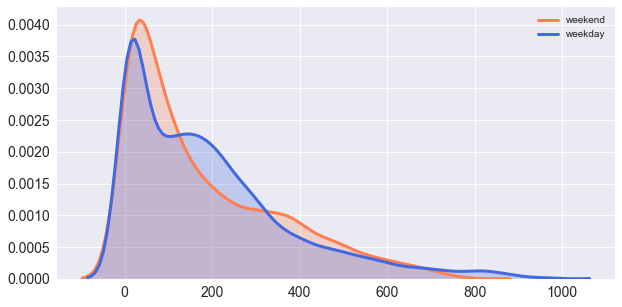

T-test 1: Ttest_indResult(statistic=-3.8760221348343125, pvalue=0.00010656536749463026)


In [15]:
fig1 = plt.figure()
p1=sns.kdeplot(weekend.cnt, shade=True, color="coral", label='weekend')
p2=sns.kdeplot(weekday.cnt, shade=True, color="royalblue", label='weekday')
plt.legend()
plt.show()
print('T-test 1:',stats.ttest_ind(a = weekend.cnt, b = weekday.cnt))
fig1.savefig('../reports/img/Q1WeekendVsWeekday.png', bbox_inches='tight')

In this case, the p-value is lower than our significance level (0.05) so we should **reject the null hypothesis.** If we were to construct a 95% confidence interval for the sample it would not capture the weekdays mean. ***Therefore the demand in the weekends is different (statistically significant) than in the weekdays.***

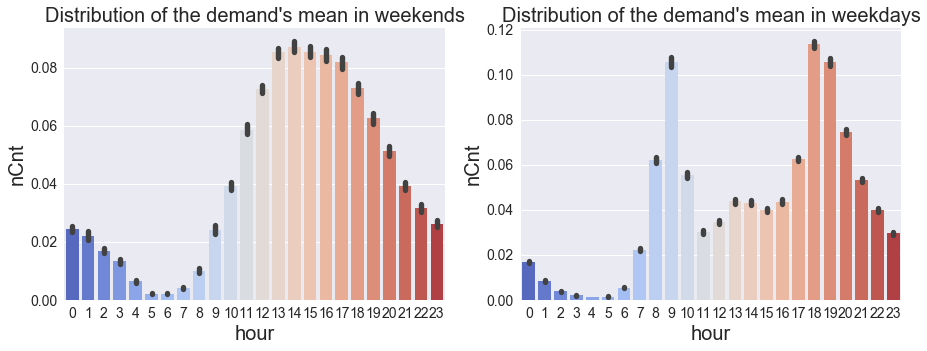

In [16]:
we_per_hr = weekend.loc[:,['hour','nCnt']] 
wd_per_hr = weekday.loc[:,['hour','nCnt']]

fig = plt.figure(figsize=(15,5))
axes1 = fig.add_subplot(1,2,1)
sns.barplot(x="hour", y="nCnt", data=we_per_hr, palette='coolwarm').set_title("Distribution of the demand's mean in weekends")

axes2 = fig.add_subplot(1,2,2)
sns.barplot(x="hour", y="nCnt", data=wd_per_hr, palette='coolwarm').set_title("Distribution of the demand's mean in weekdays")
plt.show()
fig.savefig('../reports/img/Q1WeekendVsWeekdayTS.png', bbox_inches='tight')

In the weekends bikers start their day around 9am and then it goes incrementally til 1pm to then begin a smooth decline in the late night hours and reach an inactivity state around 5am-6am. 
Activity on the weekdays appears to have 2 peaks, one at 9am and the other one at 6pm. The comparison made by the t-test is noticeable so we can appreciate how the demand is different amongst these 2 groups of the week. 